In [2]:
# !pip install plotly
# !pip install seaborn



In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/l3llff/flowers/")

100%|██████████| 228M/228M [00:22<00:00, 10.6MB/s] 


In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.applications.xception import preprocess_input
import os

2023-12-17 04:49:40.045586: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-17 04:49:40.374953: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 04:49:40.375010: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 04:49:40.440684: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-17 04:49:40.569890: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-17 04:49:40.571548: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
flowers_path = './flowers/flowers'

classes = os.listdir(flowers_path)


FileNotFoundError: [Errno 2] No such file or directory: './flowers/flowers'

In [8]:
# Generador de imagenes por lotes, se hace así para no saturar la memoria

image_size = (128, 128)
batch_size = 32

# Configuración del generador de imagenes, es un pre procesamiento
# Mas adelante se puede usar con el metodo "take"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_path,
    validation_split=0.2,          
    subset="training",             
    seed=42,                     
    image_size=image_size,         
    batch_size=batch_size,         
    label_mode="categorical",      
    class_names=classes
)


Found 15740 files belonging to 16 classes.
Using 12592 files for training.


2023-12-17 18:26:56.808059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-17 18:26:56.814616: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-17 18:26:56.814906: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-17 18:26:56.815488: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

# EDA

In [9]:
len(classes)


16

In [10]:
classes

['california_poppy',
 'water_lily',
 'astilbe',
 'iris',
 'coreopsis',
 'tulip',
 'black_eyed_susan',
 'daffodil',
 'calendula',
 'common_daisy',
 'magnolia',
 'sunflower',
 'rose',
 'carnation',
 'dandelion',
 'bellflower']

In [11]:
# todo
# flower distribution
# In order to keep track of my data details or in order to do some EDA, I always try to 
# get the information in a dataframe. After all, pandas to the rescue!!

# A list that is going to contain tuples: (species of the flower, corresponding image path)
flowers = []

for species in classes:
    # Get all the file names
    all_flowers = os.listdir(os.path.join(flowers_path , species))
    # Add them to the list
    for flower in all_flowers:
        flowers.append((species, str(os.path.join(flowers_path , species)) + '/' + flower))

# Build a dataframe        
flowers = pd.DataFrame(data=flowers, columns=['category', 'image'], index=None)
flowers.sample(5)

category                                              image
5509              tulip  ./flowers/flowers/tulip/507377149_fa9a1c4f84_c...
11391         sunflower  ./flowers/flowers/sunflower/9685540179_1318254...
9248       common_daisy  ./flowers/flowers/common_daisy/48138659617_45f...
215    california_poppy  ./flowers/flowers/california_poppy/50193738793...
11988              rose  ./flowers/flowers/rose/37065218184_40542a32b7_...

In [12]:
# Let's check how many samples for each category are present
print("Total number of flowers in the dataset: ", len(flowers))
fl_count = flowers['category'].value_counts()
print("Flowers in each category: ")
print(fl_count)

Total number of flowers in the dataset:  15740
Flowers in each category: 
iris                1054
dandelion           1052
tulip               1048
magnolia            1048
coreopsis           1047
sunflower           1027
california_poppy    1022
black_eyed_susan    1000
rose                 999
water_lily           982
common_daisy         980
calendula            978
daffodil             970
carnation            923
bellflower           873
astilbe              737
Name: category, dtype: int64


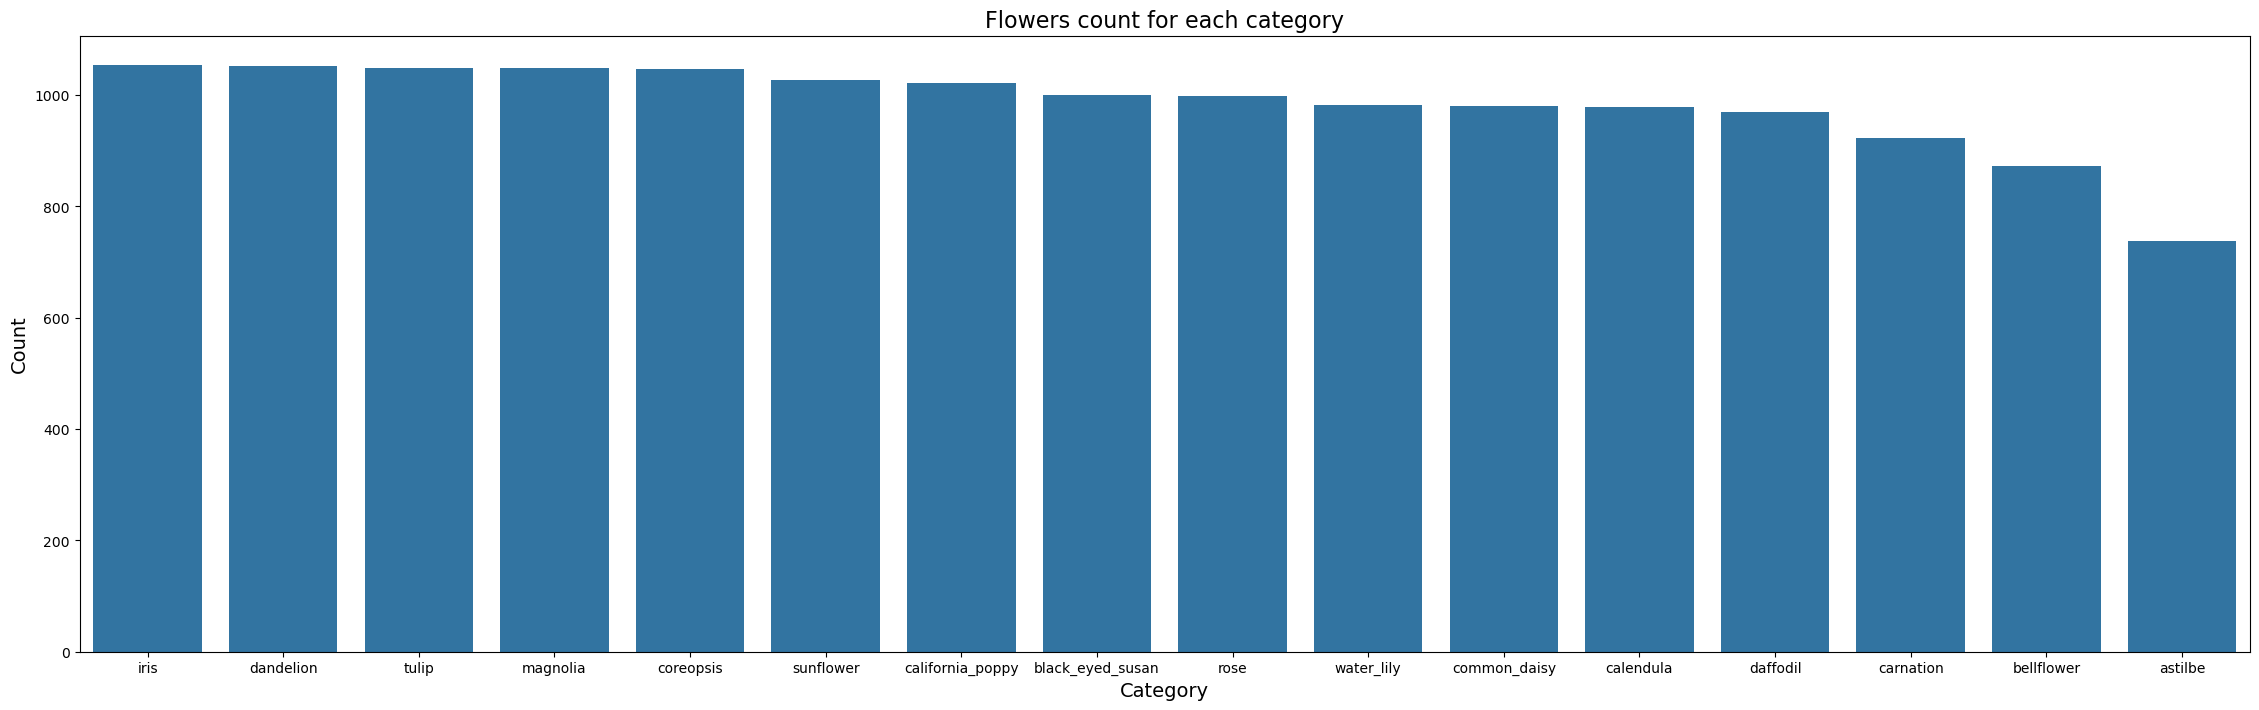

In [13]:
plt.figure(figsize=(28,8))
sns.barplot(x=fl_count.index, y=fl_count.values)
plt.title("Flowers count for each category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

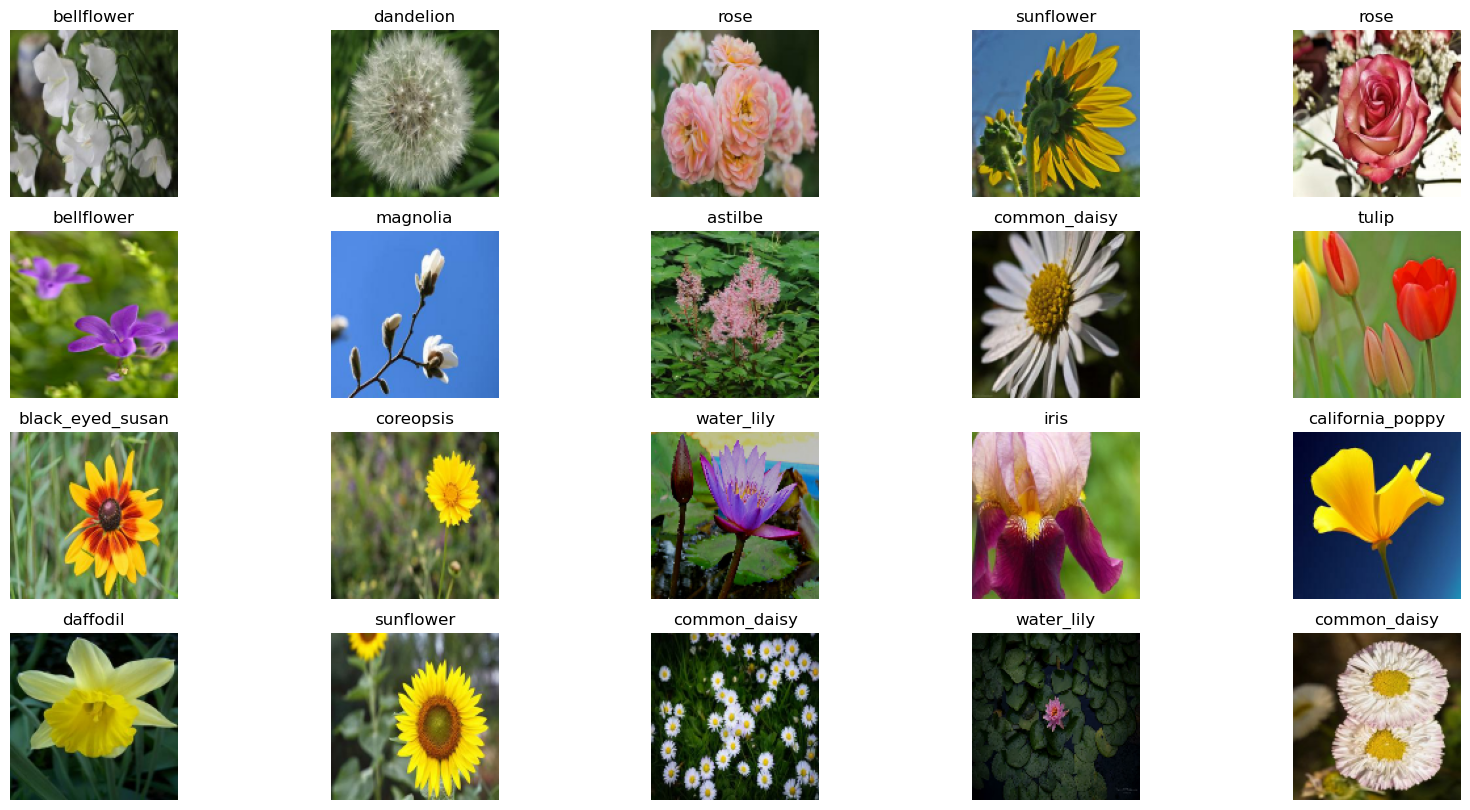

In [14]:
# show 20 images of one of the training batches with their category
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):      # get 1 from generator
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[np.argmax(labels[i])])  # argmax helps us get the index of the classes for the titles
        plt.axis("off")
plt.show()

In [16]:

# Define your preprocessing function
def preprocess_image(image, label):
    image = preprocess_input(image)
    return image, label
train_ds = train_ds.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)


In [19]:
images

<tf.Tensor: shape=(32, 128, 128, 3), dtype=float32, numpy=
array([[[[ 0.8549019 ,  0.8784313 ,  0.8078431 ],
         [ 0.8705882 ,  0.8941176 ,  0.83921564],
         [ 0.8117647 ,  0.81960785,  0.77254903],
         ...,
         [ 0.9       ,  0.9       ,  0.9       ],
         [ 0.8784313 ,  0.8784313 ,  0.8784313 ],
         [ 0.927451  ,  0.927451  ,  0.927451  ]],

        [[ 0.8843137 ,  0.9078431 ,  0.85294116],
         [ 0.83921564,  0.86274505,  0.8078431 ],
         [ 0.8901961 ,  0.8980392 ,  0.8509804 ],
         ...,
         [ 0.88235295,  0.88235295,  0.88235295],
         [ 0.8941176 ,  0.8941176 ,  0.8941176 ],
         [ 0.8980392 ,  0.8980392 ,  0.8980392 ]],

        [[ 0.8372549 ,  0.8607843 ,  0.80588233],
         [ 0.8705882 ,  0.8941176 ,  0.83921564],
         [ 0.83921564,  0.8470588 ,  0.8078431 ],
         ...,
         [ 0.88235295,  0.88235295,  0.88235295],
         [ 0.8705882 ,  0.8705882 ,  0.8705882 ],
         [ 0.90588236,  0.90588236,  0.905882

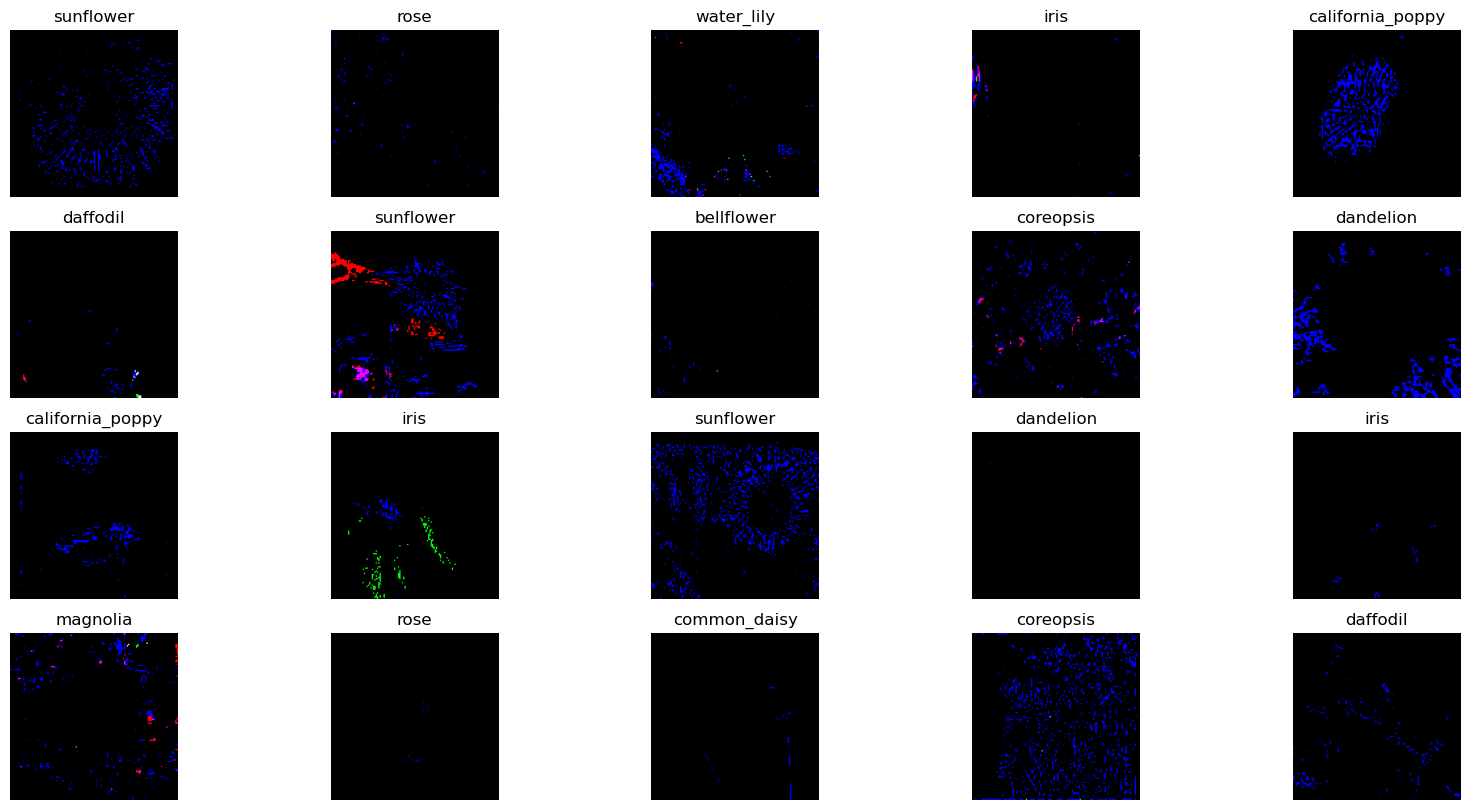

In [18]:
plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):      # get 1 from generator
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[np.argmax(labels[i])])  # argmax helps us get the index of the classes for the titles
        plt.axis("off")
plt.show()

In [74]:
# todo
# flower distribution
# In order to keep track of my data details or in order to do some EDA, I always try to 
# get the information in a dataframe. After all, pandas to the rescue!!

# A list that is going to contain tuples: (species of the flower, corresponding image path)
flowers = []

for species in classes:
    # Get all the file names
    all_flowers = os.listdir(os.path.join(flowers_path , species))
    # Add them to the list
    for flower in all_flowers:
        flowers.append((species, str(os.path.join(flowers_path , species)) + '/' + flower))

# Build a dataframe        
flowers = pd.DataFrame(data=flowers, columns=['category', 'image'], index=None)
flowers.sample(5)

category                                              image
10712          magnolia  ./flowers/flowers/magnolia/51558959219_333b8e8...
8977       common_daisy  ./flowers/flowers/common_daisy/16912996580_885...
4091          coreopsis  ./flowers/flowers/coreopsis/20536169911_8362c9...
6524   black_eyed_susan  ./flowers/flowers/black_eyed_susan/3574273087_...
3843          coreopsis  ./flowers/flowers/coreopsis/4715257179_1f8faf8...

In [11]:
# Let's check how many samples for each category are present
print("Total number of flowers in the dataset: ", len(flowers))
fl_count = flowers['category'].value_counts()
print("Flowers in each category: ")
print(fl_count)

Total number of flowers in the dataset:  15740
Flowers in each category: 
iris                1054
dandelion           1052
tulip               1048
magnolia            1048
coreopsis           1047
sunflower           1027
california_poppy    1022
black_eyed_susan    1000
rose                 999
water_lily           982
common_daisy         980
calendula            978
daffodil             970
carnation            923
bellflower           873
astilbe              737
Name: category, dtype: int64


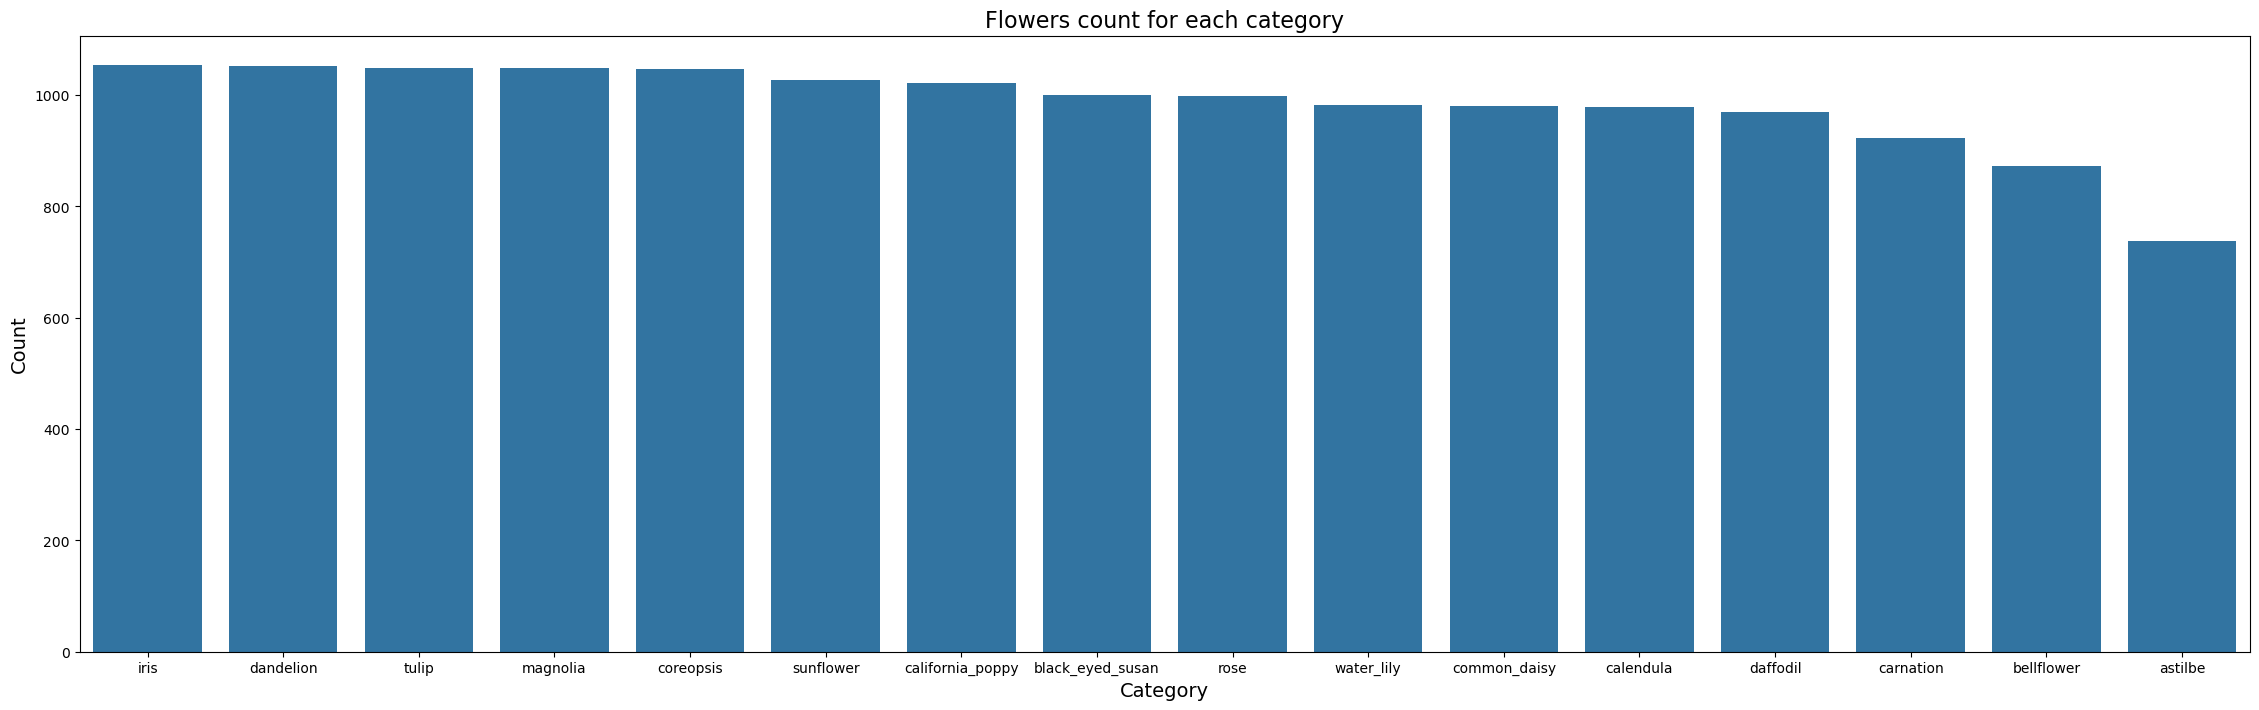

In [12]:
plt.figure(figsize=(28,8))
sns.barplot(x=fl_count.index, y=fl_count.values)
plt.title("Flowers count for each category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

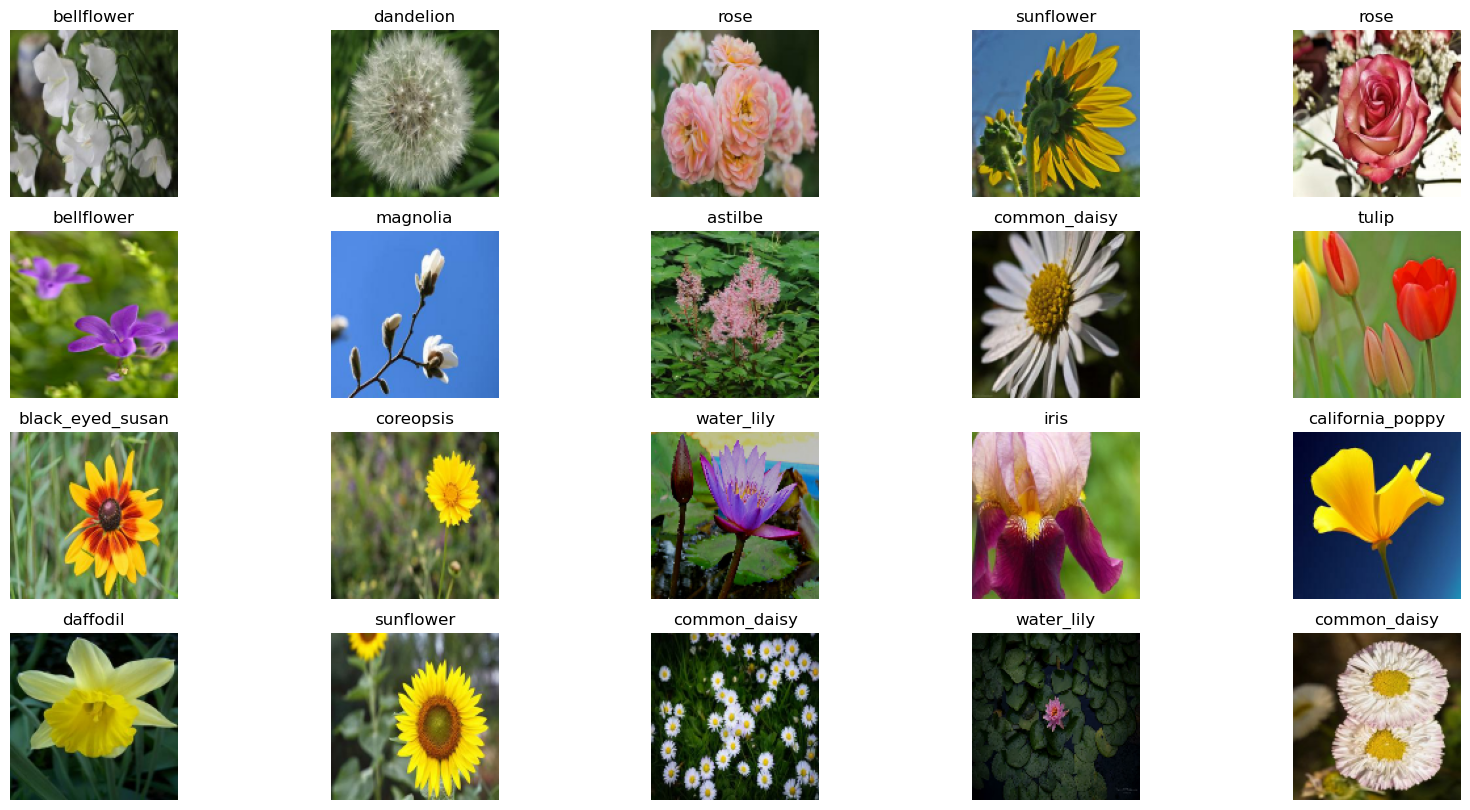

In [13]:
# show 20 images of one of the training batches with their category
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):      # get 1 from generator
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[np.argmax(labels[i])])  # argmax helps us get the index of the classes for the titles
        plt.axis("off")
plt.show()

In [14]:

# Define your preprocessing function
def preprocess_image(image, label):
    image = preprocess_input(image)
    return image, label


In [15]:
train_ds = train_ds.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)


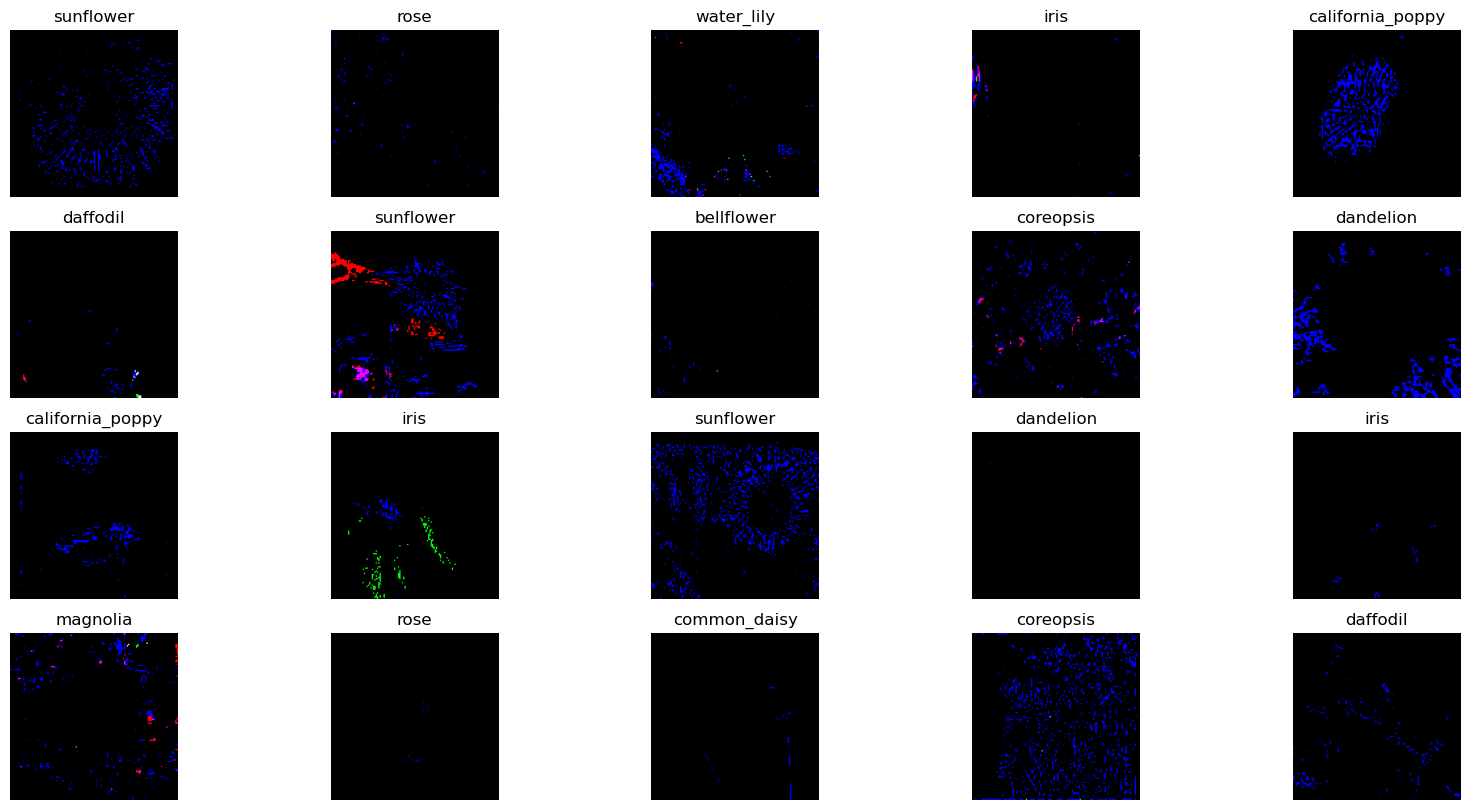

In [16]:
plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):      # get 1 from generator
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[np.argmax(labels[i])])  # argmax helps us get the index of the classes for the titles
        plt.axis("off")
plt.show()

In [17]:
# simple model

# input image size
input_shape = (128, 128, 3)

# Perceptron model definition
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(200, activation="relu"),
        layers.Dense(10, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(1000, activation='relu'),
        
        layers.Dense(len(classes), activation="softmax"),
    ]
)

# Construir el modelo y ver la arquitectura
model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 200)               9830600   
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                                 
 dense_2 (Dense)             (None, 100)               1100      
                                                                 
 dense_3 (Dense)             (None, 1000)              101000    
                                                                 
 dense_4 (Dense)             (None, 16)                16016     
                                                                 
Total params: 9,950,726
Trainable params: 9,950,726
Non-

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [19]:
history = model.fit(train_ds, epochs=10, verbose=1, validation_data=val_ds)


Epoch 1/10
394/394 [==============================] - 8s 19ms/step - loss: 2.8064 - accuracy: 0.0736 - val_loss: 2.8887 - val_accuracy: 0.0610
Epoch 2/10
394/394 [==============================] - 6s 15ms/step - loss: 2.6982 - accuracy: 0.0915 - val_loss: 20.8289 - val_accuracy: 0.0635
Epoch 3/10
394/394 [==============================] - 6s 15ms/step - loss: 2.5370 - accuracy: 0.1227 - val_loss: 667.6685 - val_accuracy: 0.0661
Epoch 4/10
394/394 [==============================] - 6s 15ms/step - loss: 2.4495 - accuracy: 0.1373 - val_loss: 96.4300 - val_accuracy: 0.1210
Epoch 5/10
394/394 [==============================] - 6s 15ms/step - loss: 2.3990 - accuracy: 0.1507 - val_loss: 85.3510 - val_accuracy: 0.0670
Epoch 6/10
394/394 [==============================] - 6s 15ms/step - loss: 2.3258 - accuracy: 0.1752 - val_loss: 54.6245 - val_accuracy: 0.1385
Epoch 7/10
394/394 [==============================] - 6s 15ms/step - loss: 2.2299 - accuracy: 0.2012 - val_loss: 246.8021 - val_accuracy

In [20]:
# we see tht perceptron is not working. obvioussly
# lets build CNN thus! 

In [28]:
# # modelling  using a CNN.

model_cnn = keras.Sequential([
    Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    Conv2D(filters=96, kernel_size=(3, 3), padding='Same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    Flatten(),
    Dense(512),
    Activation('relu'),
    Dense(16, activation="softmax")
])
    
    
# model = keras.Sequential(
#     [
#         layers.Dense(1000, activation='relu'),
        
#         layers.Dense(len(classes), activation="softmax"),
#     ]
# )


# model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
# model.add(MaxPooling2D(pool_size=(2,2)))


# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

# model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dense(5, activation = "softmax"))
model_cnn.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model_cnn.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 96)        55392     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 96)      

In [29]:
history_cnn = model_cnn.fit(train_ds, epochs=10, verbose=1, validation_data=val_ds)


Epoch 1/10


2023-12-17 15:25:17.474352: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-17 15:25:18.137418: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-17 15:25:18.137924: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-17 15:25:18.137968: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-17 15:25:18.138572: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-17 15:25:18.138660: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


394/394 [==============================] - 11s 23ms/step - loss: 1.7668 - accuracy: 0.4013 - val_loss: 157.7322 - val_accuracy: 0.3517
Epoch 2/10
394/394 [==============================] - 8s 21ms/step - loss: 1.2302 - accuracy: 0.5831 - val_loss: 112.4815 - val_accuracy: 0.4314
Epoch 3/10
394/394 [==============================] - 8s 21ms/step - loss: 0.9346 - accuracy: 0.6819 - val_loss: 155.1690 - val_accuracy: 0.3628
Epoch 4/10
394/394 [==============================] - 9s 21ms/step - loss: 0.6677 - accuracy: 0.7703 - val_loss: 175.6764 - val_accuracy: 0.4203
Epoch 5/10
394/394 [==============================] - 9s 22ms/step - loss: 0.4249 - accuracy: 0.8545 - val_loss: 252.2186 - val_accuracy: 0.4495
Epoch 6/10
394/394 [==============================] - 9s 21ms/step - loss: 0.2864 - accuracy: 0.9018 - val_loss: 278.4125 - val_accuracy: 0.4393
Epoch 7/10
394/394 [==============================] - 8s 21ms/step - loss: 0.1908 - accuracy: 0.9354 - val_loss: 341.4838 - val_accuracy: 0.

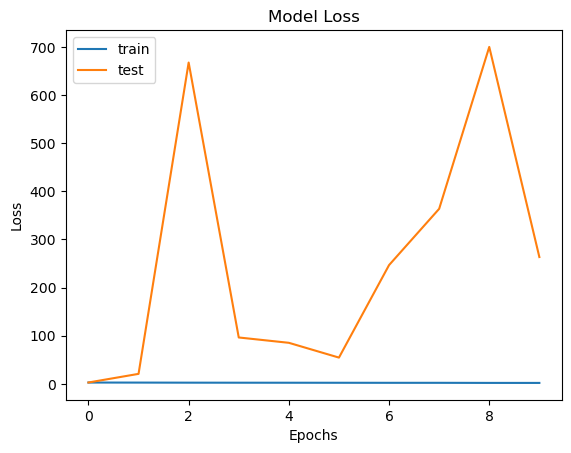

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [32]:
# input_shape = keras.Model(inputs, outputs)
input_shape

(128, 128, 3)

In [ ]:
def get_model():
    # Get base model 
    base_model = VGG16(include_top=False, input_shape=(150,150,3))
    # Freeze the layers in base model
    for layer in base_model.layers:
        layer.trainable = False
    # Get base model output 
    base_model_ouput = base_model.output
    
    # Add new layers
    x = Flatten()(base_model.output)
    x = Dense(500, activation='relu', name='fc1')(x)
    x = Dropout(0.5)(x)
    x = Dense(5, activation='softmax', name='fc2')(x)
    
    model = Model(inputs=base_model.input, outputs=x)
    return model

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

In [40]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)

base_model.trainable = False
droprate=0.2
learning_rate=0.01
size_inner=300
#########################################

inputs = keras.Input(shape=input_shape)
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)

inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
drop = keras.layers.Dropout(droprate)(inner)

outputs = keras.layers.Dense(16)(drop)

model_fine = keras.Model(inputs, outputs)

#########################################

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model_fine.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)
model_fine.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 global_average_pooling2d_7   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_21 (Dense)            (None, 300)               614700    
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 dense_22 (Dense)            (None, 16)                4816      
                                                           

In [41]:
history_fine = model_fine.fit(train_ds, epochs=10, verbose=1, validation_data=val_ds)


Epoch 1/12
394/394 [==============================] - 20s 49ms/step - loss: 0.9559 - accuracy: 0.7062 - val_loss: 127.2633 - val_accuracy: 0.0565
Epoch 2/12
 73/394 [====>.........................] - ETA: 12s - loss: 0.9719 - accuracy: 0.7042

KeyboardInterrupt: 

In [ ]:
# Load a convolutional base with pre-trained weights
base_model = keras.applications.Xception(
    weights='imagenet',
    include_top=False,
   )

# Freeze the base model
base_model.trainable = False

# Use a Sequential model to add a trainable classifier on top
model = keras.Sequential([
    base_model,
    layers.Dense(1000),
])

# Compile & train
model.compile(...)
model.fit(...)




# check predictions

1/1 [==============================] - 0s 15ms/step


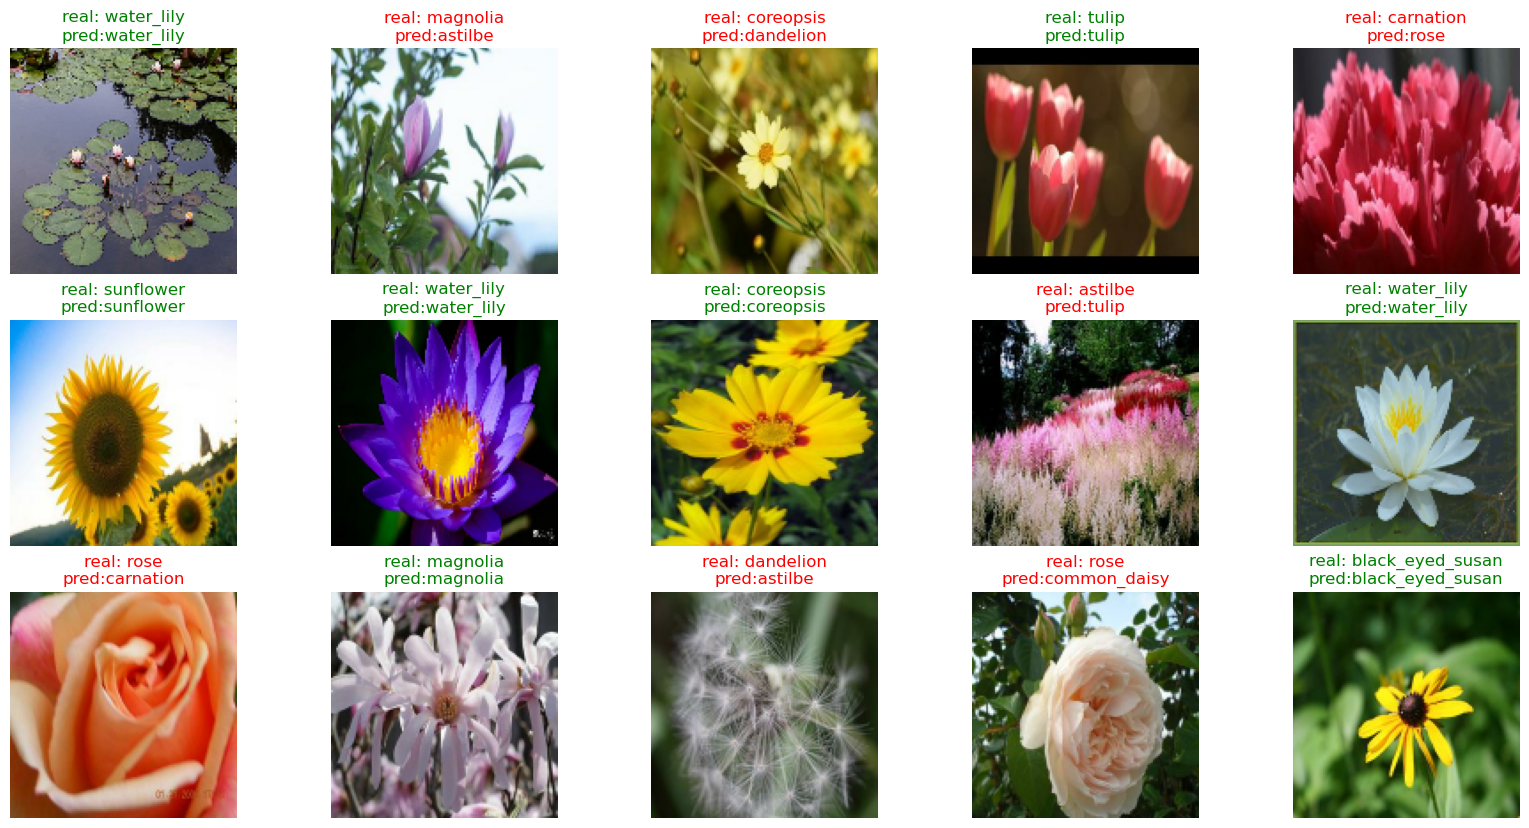

In [ ]:
plt.figure(figsize=(20, 10))
for images, labels in val_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        
        img_array = images[i].numpy().astype("uint8")
        prediction = model_cnn.predict(np.array([img_array]))
        prediction_name = classes[np.argmax(prediction)]
        real_name = classes[np.argmax(labels[i])]
        
        plt.imshow(img_array)
        if prediction_name == real_name:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'g'})
        else:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'r'})
        
        plt.axis("off")